# Spectral analyses

## Intoductory notes:
This notebook presents spectral analyses functionality:
* Power spectral density (PSD) per sleep stage
* Spectrogram & hypnogram
* Topomaps for the spectra per sleep stage
* Spectral parametrization with FOOOF
* Additional results such as sleep statistics.

Recommended watching and reading:
1. [Mike X Cohen: Static spectral analysis](https://youtube.com/playlist?list=PLn0OLiymPak2jxGCbWrcgmXUtt9Lbjj_A)
2. [MNE: The Spectrum and EpochsSpectrum classes: frequency-domain data](https://mne.tools/stable/auto_tutorials/time-freq/10_spectrum_class.html#)
3. [FOOOF: Tutorials](https://fooof-tools.github.io/fooof/auto_tutorials/index.html)

## Import data

### Import module

In [1]:
from sleepeeg.pipeline import SpectralPipe

### Initialize SpectralPipe object

In [2]:
spectral_pipe = SpectralPipe(
    # can be any type of eeg file that MNE's read_raw() function supports.
    path_to_eeg=r"C:\Users\Gennadiy\Documents\data\HZ4\processing\ICAPipe\after_ica_raw.fif",
    # A directory you want the results to be saved in.
    output_dir=r"C:\Users\Gennadiy\Documents\data\HZ4\processing",
    # Point-per-row type of hypnogram.
    path_to_hypno=r"C:\Users\Gennadiy\Documents\data\HZ4\staging.txt",
    hypno_freq=1,  # Hypnogram's sampling frequency (visbrain's hypnograms default to 1)
)

Opening raw data file C:\Users\Gennadiy\Documents\data\HZ4\processing\ICAPipe\after_ica_raw.fif...
    Reading extended channel information
    Read a total of 1 projection items:
        Average EEG reference (1 x 257)  idle
    Range : 0 ... 2032249 =      0.000 ...  8128.996 secs
Ready.
Opening raw data file C:\Users\Gennadiy\Documents\data\HZ4\processing\ICAPipe\after_ica_raw-1.fif...
    Reading extended channel information
    Read a total of 1 projection items:
        Average EEG reference (1 x 257)  idle
    Range : 2032250 ... 2229772 =   8129.000 ...  8919.088 secs
Ready.


Hypnogram is LONGER than data by 0.91 seconds. Cropping hypnogram to match data.size.


## Compute PSD

In [3]:
spectral_pipe.compute_psds_per_stage(
    # A dict describing stages and their indices in the hypnogram file.
    sleep_stages={"Wake": 0, "N1": 1, "N2": 2, "N3": 3, "REM": 4},
    # Rereferencing to apply. Can be list of str channels or "average".
    # If None, will not change the reference.
    reference="average",
    method="welch",  # welch or multitaper
    fmin=0,  # Lower frequency bound.
    fmax=60,  # Upper frequency bound.
    picks="eeg",  # Channels to compute the PSD for.
    reject_by_annotation=True,  # Whether to reject epochs annotated as BAD.
    save=True,  # Whether to save the PSD hdf5 file for each sleep stage.
    overwrite=True,  # Whether to overwrite hdf5 files if there are any.
    n_jobs=-1,  # n_jobs, refer to the MNE documentation.
    verbose=False,  # verbose, refer to the MNE documentation.
    # Additional arguments passed to the PSD computing method, i.e., welch or multitaper:
    n_fft=1024,
    n_per_seg=1024,
    n_overlap=512,
    window="hamming",
)

Reading 0 ... 2229772  =      0.000 ...  8919.088 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Removing existing average EEG reference projection.
Setting 166506 of 2229773 (7.47%) samples to NaN, retaining 2063267 (92.53%) samples.
Setting 166506 of 2229773 (7.47%) samples to NaN, retaining 2063267 (92.53%) samples.
Setting 166506 of 2229773 (7.47%) samples to NaN, retaining 2063267 (92.53%) samples.
Setting 166506 of 2229773 (7.47%) samples to NaN, retaining 2063267 (92.53%) samples.
Setting 166506 of 2229773 (7.47%) samples to NaN, retaining 2063267 (92.53%) samples.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.


In [7]:
spectral_pipe.psds["REM"].get_data()

array([[1.12159730e-11, 8.88548338e-11, 1.53996066e-10, ...,
        1.97910058e-17, 1.96357593e-17, 1.95389615e-17],
       [8.95263632e-12, 6.96787919e-11, 1.26118316e-10, ...,
        1.70667787e-17, 1.69732521e-17, 1.68570002e-17],
       [4.74297373e-12, 3.64199309e-11, 7.17809594e-11, ...,
        1.24282278e-17, 1.23952461e-17, 1.22674078e-17],
       ...,
       [2.25152861e-12, 1.52139004e-11, 3.22564837e-11, ...,
        6.11832611e-18, 6.10261368e-18, 6.05313229e-18],
       [1.00362474e-12, 6.70567094e-12, 1.50728174e-11, ...,
        3.64050724e-18, 3.63955539e-18, 3.60047124e-18],
       [1.29844979e-12, 8.61794204e-12, 2.32816383e-11, ...,
        1.15482884e-17, 1.14933140e-17, 1.14591497e-17]])

In [8]:
spectral_pipe.psds["REM"].to_data_frame()

freq            E1            E2            E3            E4  \
0     0.000000  1.121597e-11  8.952636e-12  4.742974e-12  2.613491e-12   
1     0.244141  8.885483e-11  6.967879e-11  3.641993e-11  1.922142e-11   
2     0.488281  1.539961e-10  1.261183e-10  7.178096e-11  4.325162e-11   
3     0.732422  1.145198e-10  9.871478e-11  6.138161e-11  4.324239e-11   
4     0.976562  5.548802e-11  4.927615e-11  3.428111e-11  2.769119e-11   
..         ...           ...           ...           ...           ...   
241  58.837891  2.006180e-17  1.730734e-17  1.261477e-17  1.077617e-17   
242  59.082031  1.992085e-17  1.720258e-17  1.253555e-17  1.069510e-17   
243  59.326172  1.979101e-17  1.706678e-17  1.242823e-17  1.062788e-17   
244  59.570312  1.963576e-17  1.697325e-17  1.239525e-17  1.055727e-17   
245  59.814453  1.953896e-17  1.685700e-17  1.226741e-17  1.048299e-17   

               E5            E6            E7            E8            E9  \
0    2.008518e-12  1.562010e-12  1.995116e-12  1.315939e-12  1.184958e-12   
1    1.319050e-11  9.781429e-12  1.083401e-11  8.437810e-12  7.610523e-12   
2    3.175512e-11  2.504017e-11  2.445339e-11  2.380763e-11  2.097851e-11   
3    3.527048e-11  3.017164e-11  2.880080e-11  2.937096e-11  2.520557e-11   
4    2.466745e-11  2.216278e-11  2.158627e-11  2.236670e-11  1.858579e-11   
..            ...           ...           ...           ...           ...   
241  1.091107e-17  1.103200e-17  1.220493e-17  1.340761e-17  1.110146e-17   
242  1.084838e-17  1.095341e-17  1.211129e-17  1.329624e-17  1.102343e-17   
243  1.076098e-17  1.087883e-17  1.203981e-17  1.320389e-17  1.093467e-17   
244  1.068349e-17  1.080614e-17  1.193250e-17  1.310125e-17  1.085106e-17   
245  1.062074e-17  1.071132e-17  1.187606e-17  1.303468e-17  1.080335e-17   

     ...          E248          E249          E250          E251  \
0    ...  1.727576e-11  6.234205e-12  2.781620e-12  2.307205e-12   
1    ...  1.324171e-10  4.660476e-11  2.000808e-11  1.627743e-11   
2    ...  2.361249e-10  8.893730e-11  4.127710e-11  3.209698e-11   
3    ...  1.804473e-10  7.246223e-11  3.748320e-11  3.078287e-11   
4    ...  8.874072e-11  3.943897e-11  2.305046e-11  2.039744e-11   
..   ...           ...           ...           ...           ...   
241  ...  2.813737e-17  1.275212e-17  7.114322e-18  6.517549e-18   
242  ...  2.791946e-17  1.265862e-17  7.059553e-18  6.446900e-18   
243  ...  2.774638e-17  1.254757e-17  6.991918e-18  6.399232e-18   
244  ...  2.757270e-17  1.250065e-17  6.994621e-18  6.390680e-18   
245  ...  2.743555e-17  1.243105e-17  6.923300e-18  6.340613e-18   

             E252          E253          E254          E255          E256  \
0    2.135936e-11  6.511878e-12  4.388799e-12  2.251529e-12  1.003625e-12   
1    1.661195e-10  5.033913e-11  3.280497e-11  1.521390e-11  6.705671e-12   
2    2.915069e-10  9.176334e-11  6.292463e-11  3.225648e-11  1.507282e-11   
3    2.166930e-10  7.234395e-11  5.348703e-11  3.088915e-11  1.601057e-11   
4    1.023825e-10  3.708444e-11  2.914256e-11  1.953945e-11  1.131309e-11   
..            ...           ...           ...           ...           ...   
241  3.443748e-17  1.208406e-17  9.529407e-18  6.218680e-18  3.705924e-18   
242  3.418440e-17  1.199117e-17  9.463812e-18  6.169224e-18  3.677376e-18   
243  3.396470e-17  1.191604e-17  9.384787e-18  6.118326e-18  3.640507e-18   
244  3.374556e-17  1.183655e-17  9.351536e-18  6.102614e-18  3.639555e-18   
245  3.355516e-17  1.176781e-17  9.272235e-18  6.053132e-18  3.600471e-18   

             VREF  
0    1.298450e-12  
1    8.617942e-12  
2    2.328164e-11  
3    2.734367e-11  
4    1.953022e-11  
..            ...  
241  1.174528e-17  
242  1.167512e-17  
243  1.154829e-17  
244  1.149331e-17  
245  1.145915e-17  

[246 rows x 258 columns]

## Visualize

### PSD

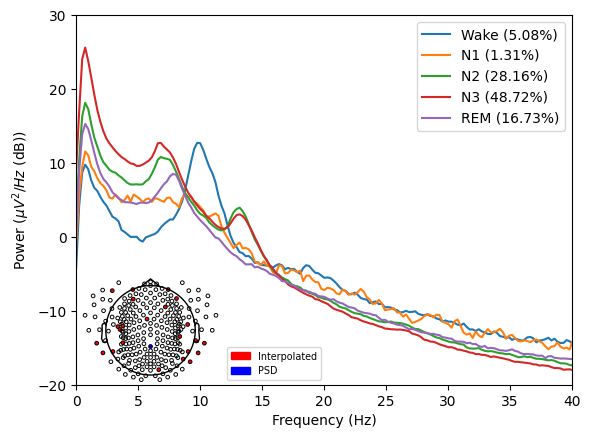

In [5]:
spectral_pipe.plot_psds(
    picks=["E101"],
    psd_range=(-20, 30),  # Y axis limits
    freq_range=(0, 40),  # X axis limits
    dB=True,
    xscale="linear",  # Matplotlib xscale. Can be {"linear", "log", "symlog", "logit", ...} or ScaleBase
    axis=None,
    plot_sensors=True,  # Whether to plot EEG sensors showing which channels were used to compute PSD.
    save=True,  # Whether to save the plot as a png file.
)

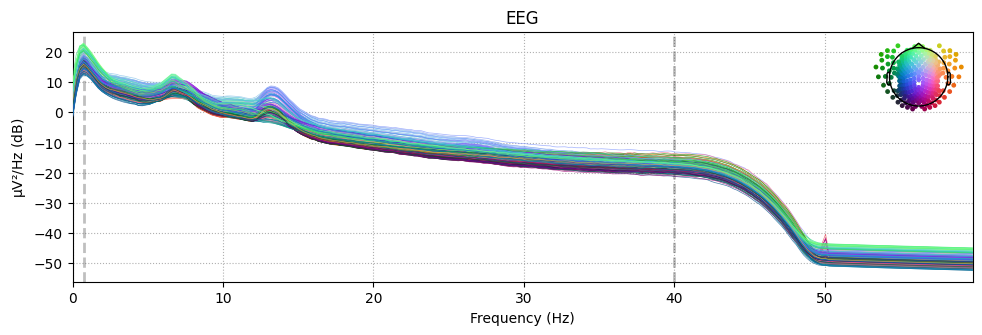

In [6]:
_ = spectral_pipe.psds["N2"].plot(picks="data", exclude="bads", show=False)

### Hypnogram & spectrogram

Setting 289559 of 5985608 (4.84%) samples to NaN, retaining 5696049 (95.16%) samples.


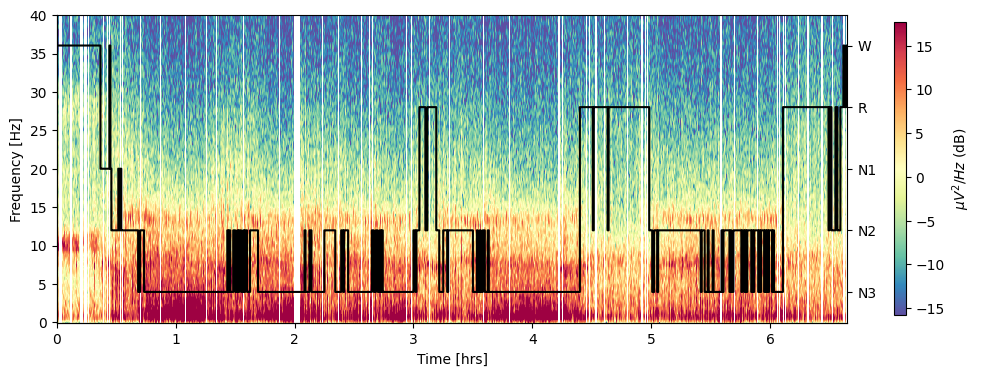

In [3]:
spectral_pipe.plot_hypnospectrogram(
    picks=["E101"],  # Channel[s] to compute the spectrogram on.
    win_sec=10,  # The length of the sliding window, in seconds, used for multitaper PSD computation.
    freq_range=(0, 40),  # Y axis limits
    cmap="Spectral_r",  # Matplotlib colormap as in https://matplotlib.org/stable/tutorials/colors/colormaps.html
    overlap=True,  # Whether to plot hypnogram over spectrogram (True) or on top of it (False)
    save=True,  # Whether to save the plot as a file.
)

### Topomap

Plots a topomap for a single sleep stage and frequency band

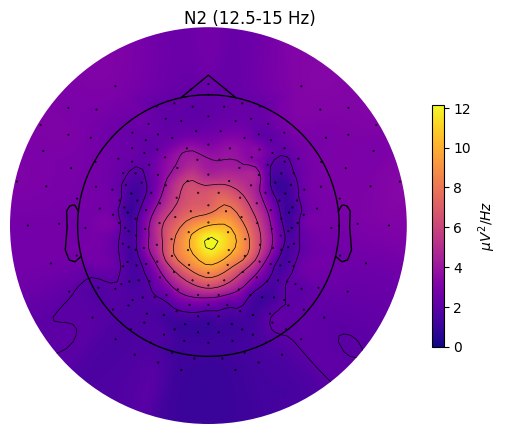

In [12]:
spectral_pipe.plot_topomap(
    stage="N2",  # Stage to plot topomap for.
    band={"SMR": (12.5, 15)},  # Band to plot topomap for.
    # Should contain at least index of the provided "stage".
    dB=False,  # Whether to transform PSD to dB/Hz
    axis=None,  # Whether to plot on provided matplotlib axis.
    save=True,  # Whether to save the plot as a file.
    topomap_args=dict(cmap="plasma"),  # Arguments passed to mne.viz.plot_topomap().
    cbar_args=None,  # Arguments passed to plt.colorbar().
    subplots_args=None,  # Arguments passed to the plt.subplots(). Have no effect if axis is provided.
)

### Topomap collage
Plot topomaps for multiple bands and sleep stages

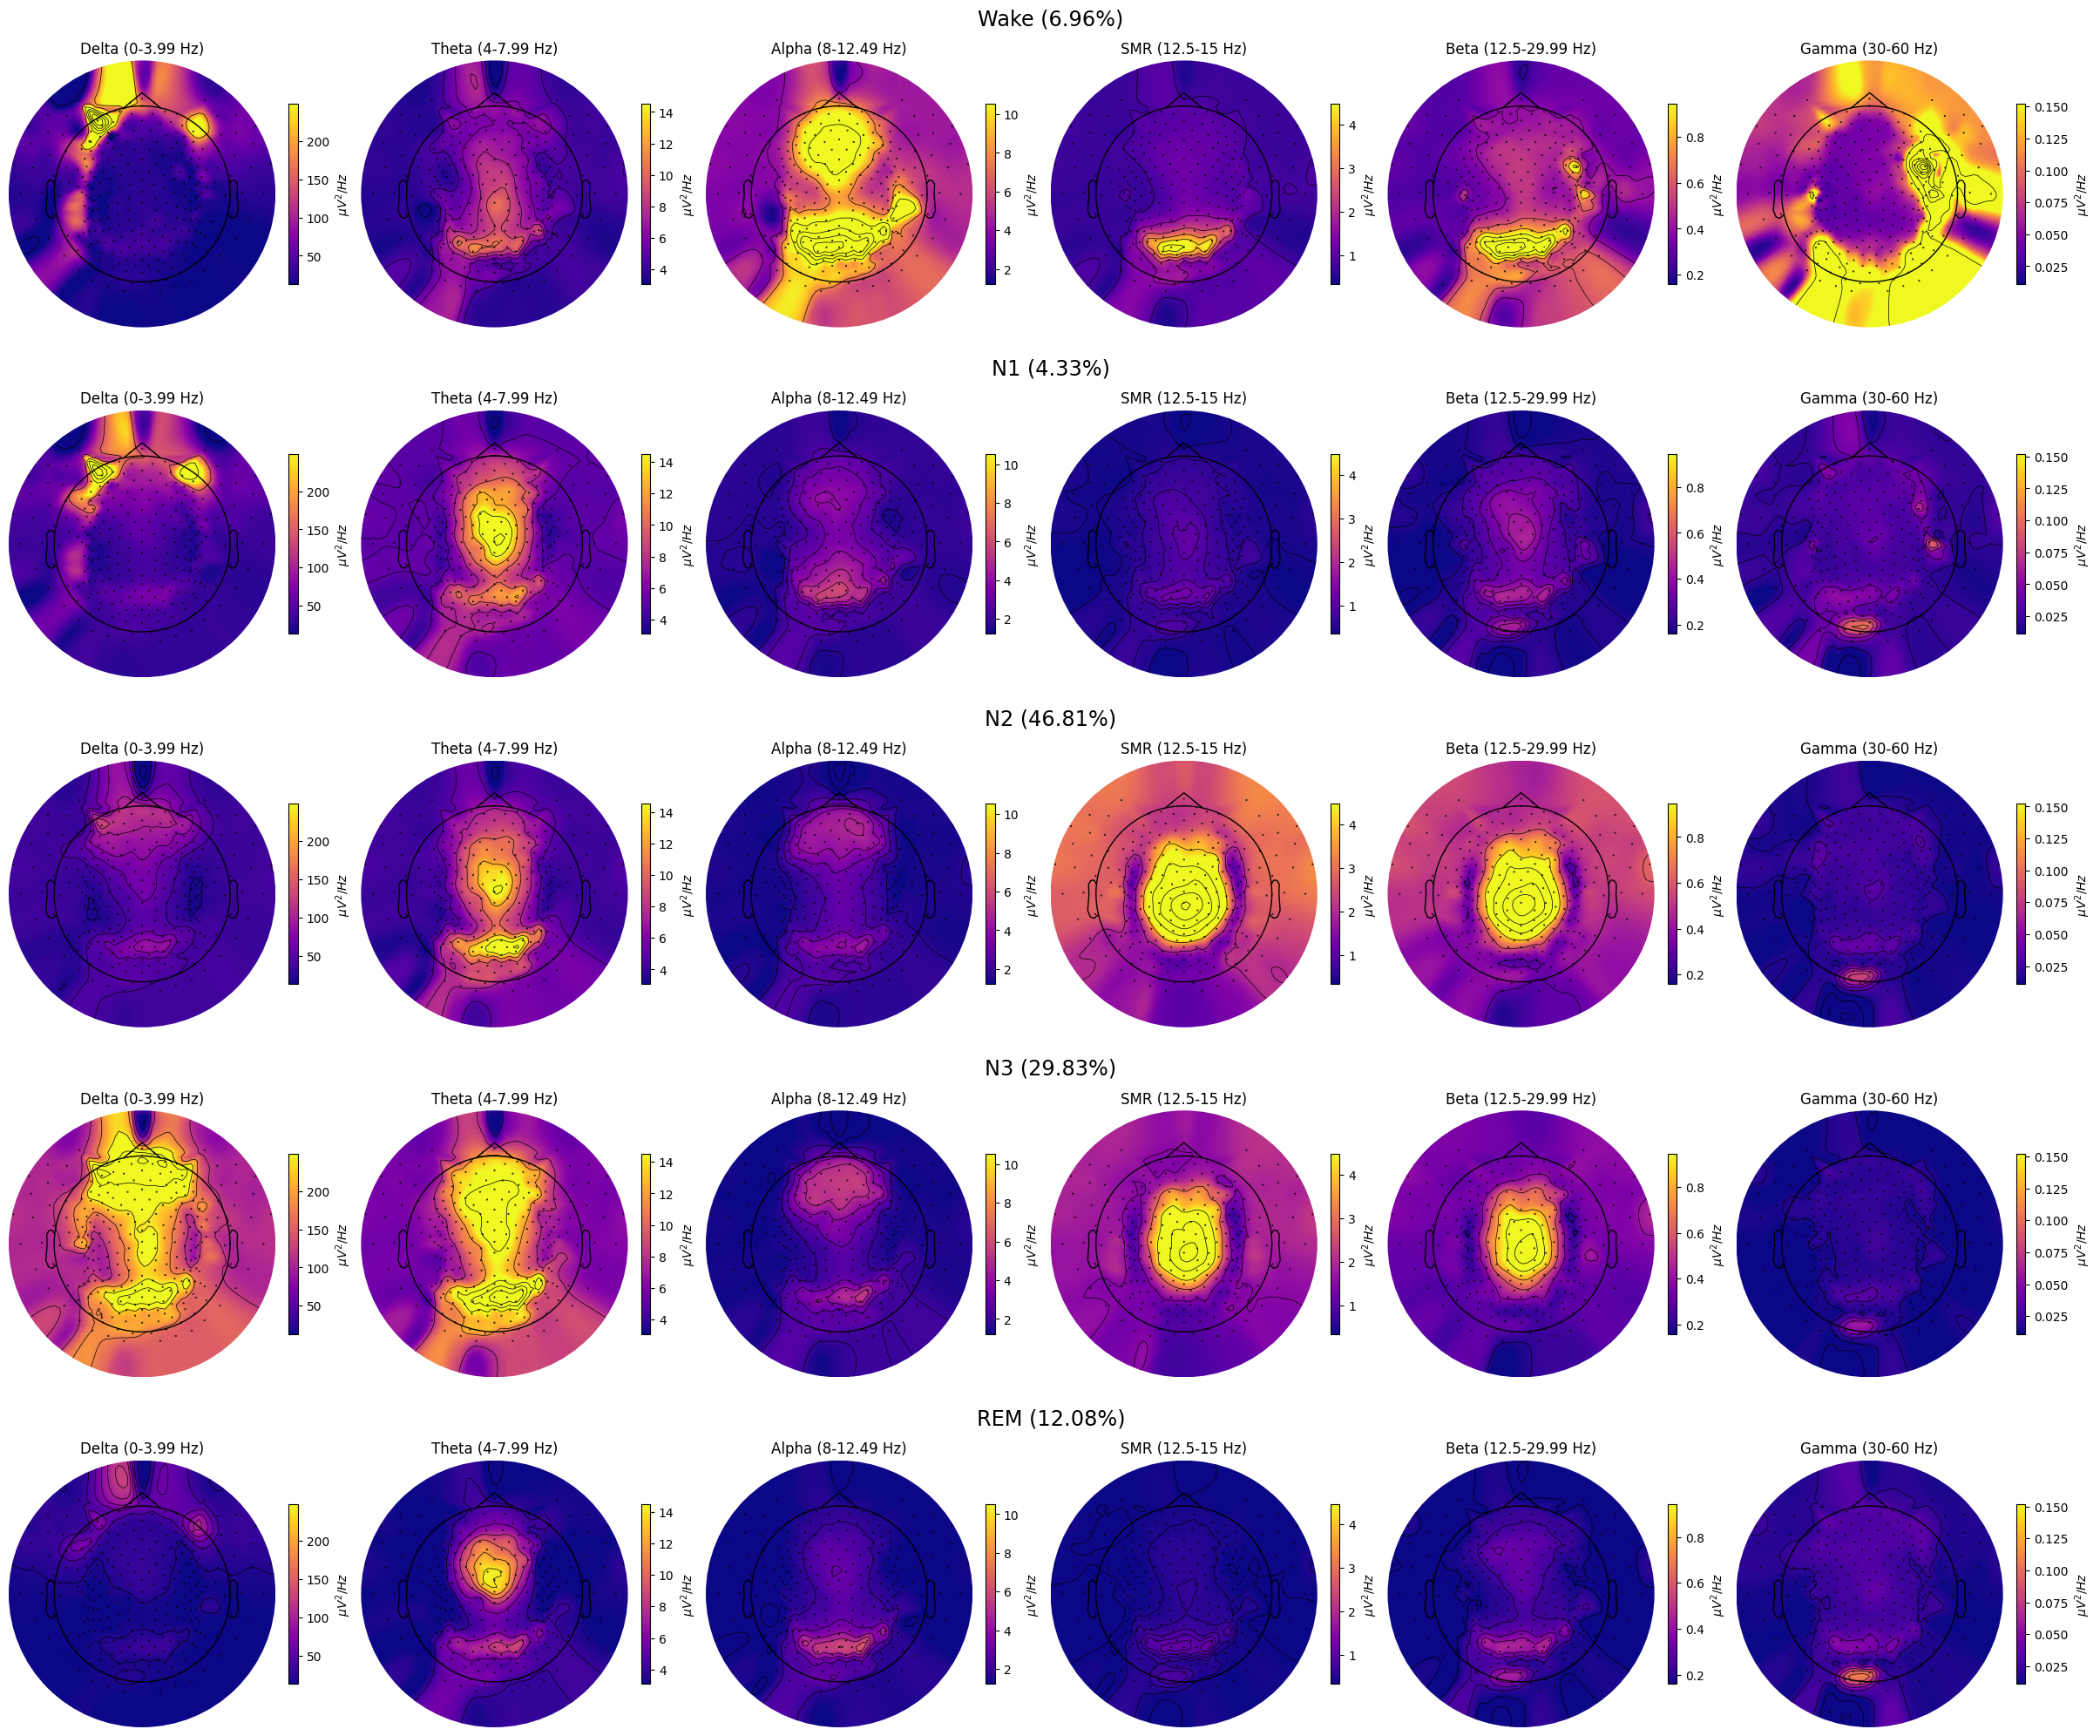

In [14]:
spectral_pipe.plot_topomap_collage(
    #  Bands to plot topomaps for.
    bands = {'Delta': (0, 3.99), 'Theta': (4, 7.99),
            'Alpha': (8, 12.49), 'SMR': (12.5, 15), 
            'Beta': (12.5, 29.99), 'Gamma': (30, 60)},
    # Tuple of strs or "all", e.g., ("N1", "REM") or "all" (plots all "sleep_stages").
    stages_to_plot="all", 
    dB=False,  # Whether to transform PSD to dB/Hz.
    low_percentile=5,  # Set min color value by percentile of the band data.
    high_percentile=95,  # Set max color value by percentile of the band data.
    save=True,  # Whether to save the plot as a file.
    topomap_args=dict(cmap='plasma'),  # Arguments passed to mne.viz.plot_topomap().
    cbar_args=None,  # Arguments passed to plt.colorbar().
    figure_args=None,  # Arguments passed to the plt.figure().
)

## Parametrize spectrum

In [4]:
spectral_pipe.parametrize(
    picks=['eeg'],  # Channels to use.
    freq_range=[0.5,60],  # Range of frequencies to parametrize.
    # Whether to average psds over channels.
    # If False or multiple channels are provided, the FOOOFGroup will be used.
    # Defaults to False.
    average_ch=False
    )

c:\Users\Gennadiy\Documents\eeg-processing-pipeline\sleepeeg\pipeline.py:375: DeprecationWarning: 
The `fooof` package is being deprecated and replaced by the `specparam` (spectral parameterization) package.
This version of `fooof` (1.1) is fully functional, but will not be further updated.
New projects are recommended to update to using `specparam` (see Changelog for details).
  from fooof import FOOOFGroup


Running FOOOFGroup across 257 power spectra.
Running FOOOFGroup across 257 power spectra.
Running FOOOFGroup across 257 power spectra.
Running FOOOFGroup across 257 power spectra.
Running FOOOFGroup across 257 power spectra.


Running FOOOFGroup across 257 power spectra.
                                                                                                  
                                       FOOOF - GROUP RESULTS                                      
                                                                                                  
                            Number of power spectra in the Group: 257                             
                                                                                                  
                        The model was run on the frequency range 0 - 60 Hz                        
                                 Frequency Resolution is 0.24 Hz                                  
                                                                                                  
                              Power spectra were fit without a knee.                              
                                                                

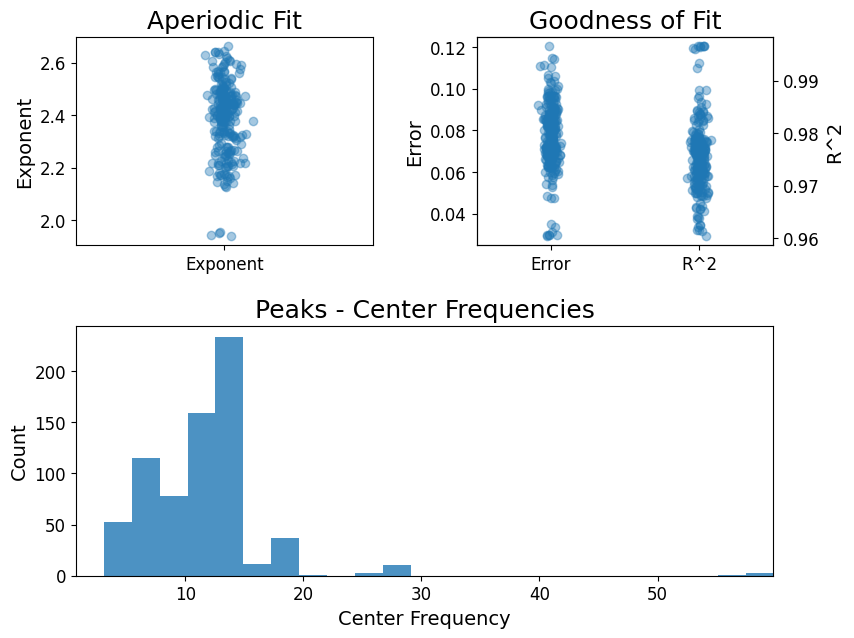

In [15]:
spectral_pipe.fooofs['N2'].report()

## Sleep Stats

In [11]:
spectral_pipe.sleep_stats(save=False)

{'TIB': 399.03333333333336,
 'SPT': 376.5,
 'WASO': 1.0,
 'TST': 375.5,
 'N1': 6.0,
 'N2': 109.5,
 'N3': 191.0,
 'REM': 69.0,
 'NREM': 306.5,
 'SOL': 22.0,
 'Lat_N1': 22.0,
 'Lat_N2': 27.5,
 'Lat_N3': 41.0,
 'Lat_REM': 183.0,
 '%N1': 1.5978695073235685,
 '%N2': 29.161118508655125,
 '%N3': 50.865512649800266,
 '%REM': 18.37549933422104,
 '%NREM': 81.62450066577897,
 'SE': 94.10241416757162,
 'SME': 99.734395750332}